# Chirp to ROC
This notebook applies some ML binary classification techniques to a simple 2D dataset and looks at the results with "confusion dots" and ROC plots.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

from sklearn.metrics import accuracy_score

# to reload the custom library
from imp import reload
# custom library
import chirp_roc_lib as chp

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.5, 5.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### (Re)Load the custom routines

In [3]:
reload(chp)

<module 'chirp_roc_lib' from '/home/dd/Documents/Python/chirp-to-ROC/chirp_roc_lib.py'>

### The 2D "diagonal chirp"

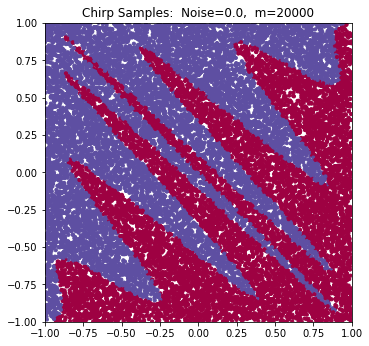

In [4]:
# Show the chirp model with no noise and many samples
#
# Chirp parameters to use (default: 6.5, 0.65, False ):
chp_nhf = 6.5
chp_warp = 0.65
chp_symm = False

show_noise=0.0

X_show, y_show = chp.make_chirp(n_out=20000,
                                nhalfcycles=chp_nhf, warpexp=chp_warp, symmetric=chp_symm, noise=show_noise)

chp.plot_Xy(X_show, y_show, title="Chirp Samples:  Noise={},  m={}".format(show_noise,len(y_show)),
                                   s = 10)

### Training and Test sets
The "test" set is very large to get an accurate measure of the model performance.

In [5]:
# Size of the Training and Test sets...

# Smaller Training is more likely to cause/allow overfitting
m_train = 250  #100  #250  #800  #2000

# Do a large test size to see accurately how the model preforms what the model looks like
m_test = 10000

In [6]:
# Could use an sklearn generator, e.g., make_moons, to generate X,Ys:
# Training set
##train_X, train_Y = sklearn.datasets.make_moons(n_samples=m_train, noise=0.2)
# Test set
##test_X, test_Y = sklearn.datasets.make_moons(n_samples=m_test, noise=0.2)

In [7]:
# Use the chirp to generate the training and test sets
# use parameters above, 
# and some noise:
chp_noise = 0.035   # this noise, 0.035, puts Bayes accuracy limit ~ 87 %

# Training set
X_train, y_train = chp.make_chirp(n_out=m_train, 
                                  nhalfcycles=chp_nhf, warpexp=chp_warp, symmetric=chp_symm, noise=chp_noise)
# Test set
X_test, y_test = chp.make_chirp(n_out=m_test,
                                nhalfcycles=chp_nhf, warpexp=chp_warp, symmetric=chp_symm, noise=chp_noise)

In [8]:
# The sizes and types of the training and test sets
print(X_train.shape, X_train.dtype, y_train.shape, y_train.dtype, X_test.shape, y_test.shape)

(250, 2) float64 (250,) float64 (10000, 2) (10000,)


In [9]:
# example values
print( X_train[0,:], y_train[0])

[0.42085572 0.84428401] 0.0


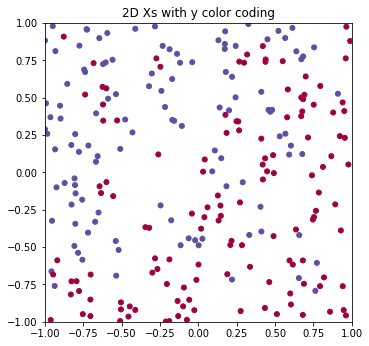

In [10]:
# Look at the Training data
chp.plot_Xy(X_train, y_train)

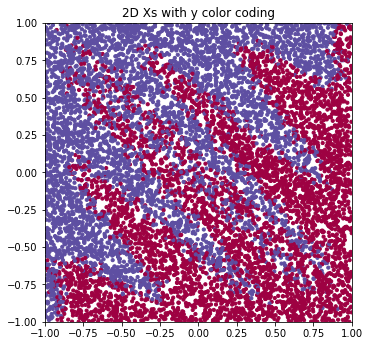

In [11]:
# Look at the Test data
chp.plot_Xy(X_test, y_test, s=10)

## Pick a Model

- - -

### The Known Model

In [12]:
# Use the actual underlying model and known parameters
model_str = "Known Chirp"

In [13]:
# Evaluate the model on training data
# If the noise is > 0 then a probability is returned.
y_score_train = chp.chirp_region(X_train,
                                nhalfcycles=chp_nhf, warpexp=chp_warp, symmetric=chp_symm, noise=chp_noise)
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 88.8 %


In [14]:
# Evaluate the (same chirp) model on the test data
y_score = chp.chirp_region(X_test,
                          nhalfcycles=chp_nhf, warpexp=chp_warp, symmetric=chp_symm, noise=chp_noise)
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 87.82 %


#### This ~ 87 %, above, is the Bayes limit we'd expect for any learning algorithm.

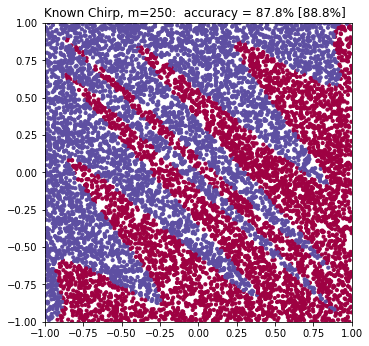

In [15]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [16]:
# --> Now go below to "Show model performance"

### Random model

In [17]:
# Just flip a coin (actually assign a random value from 0 to 1)
# No model to Train
model_str = "Random model"

In [18]:
# Evaluate the model on training data
y_score_train = np.random.rand(len(y_train))
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 48.0 %


In [19]:
# Evaluate the model on the test data
y_score = np.random.rand(len(y_test))
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 49.5 %


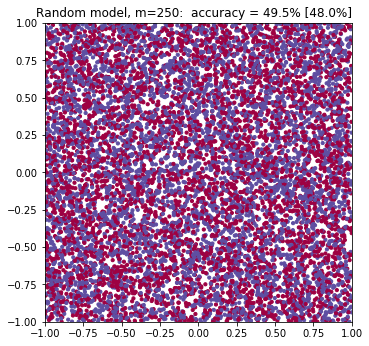

In [20]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [21]:
# --> Now go below to "Show model performance"

### Really simple model

In [22]:
# Really simple model: more likely to be y=1 (blue) when x1 is larger, 
# so map x1 to 0 to 1 using: y_score = 0.5 * (X_test[:, 1] + 1.0)
model_str = "Simple model"

In [23]:
# Evaluate the model on training data
y_score_train = 0.5 * (X_train[:, 1] + 1.0)
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 64.4 %


In [24]:
# Evaluate the model on the test data
y_score = 0.5 * (X_test[:, 1] + 1.0)
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 64.45 %


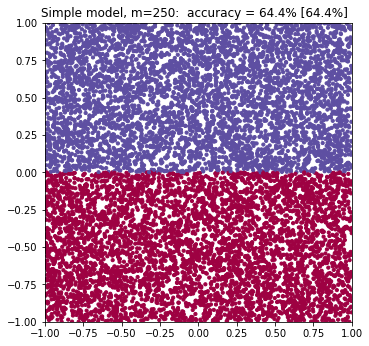

In [25]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [26]:
# --> Now go below to "Show model performance"

### Logistic Regression Model

In [27]:
# Use sklearn Logistic Regression
model_str = "Logistic Regr."
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1e5, verbose=1)
# and do the fit:
model.fit( X_train, y_train )
print(model)

[LibLinear]LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=1, warm_start=False)


In [28]:
# Evaluate the model on training data (for y=1, hence the [:,1])
y_score_train = model.predict_proba(X_train)[:,1]
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 76.4 %


In [29]:
# Evaluate the model on the test data
y_score = model.predict_proba(X_test)[:,1]
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 74.62 %


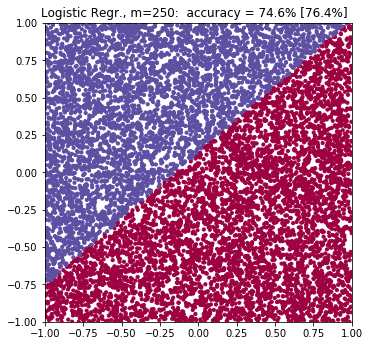

In [30]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [31]:
# --> Now go below to "Show model performance"

### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
# Evaluate the model on training data (for y=1, hence the [:,1])
y_score_train = tree_clf.predict_proba(X_train)[:,1]
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 81.2 %


In [34]:
# Evaluate the model on the test data
y_score = tree_clf.predict_proba(X_test)[:,1]
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 71.72 %


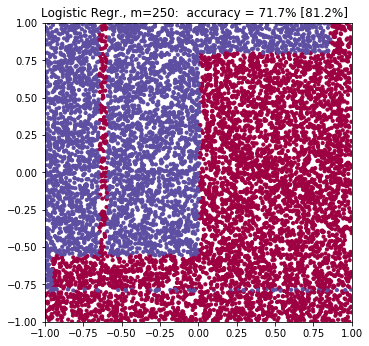

In [35]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [36]:
# --> Now go below to "Show model performance"

### Nonlinear SVM Classification

In [37]:
# From Geron'sHands-On Machine Learning book
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC

#### SVM with Polynomial Features

In [38]:
# Use polynomial features...
model_str="SVM-Poly"
#
poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=7)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=2, loss="hinge", verbose=1, max_iter=50000, penalty='l2'))
])
# and do the fit:
poly_svm_clf.fit(X_train, y_train)

[LibLinear]

/home/dd/Documents/Anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=7, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=50000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=1))])

In [39]:
# Evaluate the model on training data
y_score_train = poly_svm_clf.predict(X_train)
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 76.0 %


In [40]:
# Evaluate the model on the test data
y_score = poly_svm_clf.predict(X_test)
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 74.65 %


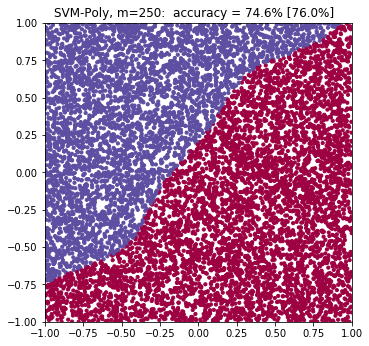

In [41]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [42]:
# --> Now go below to "Show model performance"

#### SVM with a Kernel

In [43]:
# Use a kernel instead 
model_str="SVM-kernel"
#
#                  very little regularization:   gamma=1, C=10
#                  good/medium amount (w/m=250)  gamma=0.7,  C=1
#                  heavily regularized           gamma=0.3, C=0.01
polykern_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=15, coef0=1.0, gamma=0.7, C=1, max_iter=2000000, 
                    probability=False, verbose=1))
])
# and do the fit:
polykern_svm_clf.fit(X_train, y_train)

[LibSVM]

/home/dd/Documents/Anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=15, gamma=0.7, kernel='poly',
  max_iter=2000000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=1))])

In [44]:
# Evaluate the model on training data
y_score_train = polykern_svm_clf.predict(X_train)
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 86.0 %


In [45]:
# Evaluate the model on the test data
y_score = polykern_svm_clf.predict(X_test)
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 69.12 %


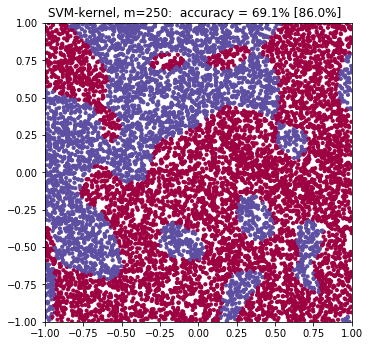

In [46]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [47]:
# --> Now go below to "Show model performance"

### Neural Network

In [48]:
# Additional packages etc to run Andrew Ng's Regularized Neural Network
# Adapted from Regularization.ipynb of Course 2 of Deep Learning
import reg_utils_dd as ng_utils
#from reg_utils_dd import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
#from reg_utils_dd import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
#from reg_utils_dd import make_chirp, model, compute_cost_with_regularization
#from reg_utils_dd import backward_propagation_with_regularization
##import sklearn
##import scipy.io

/home/dd/Documents/Anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [49]:
reload(ng_utils)

<module 'reg_utils_dd' from '/home/dd/Documents/Python/chirp-to-ROC/reg_utils_dd.py'>

#### No Regularization

Cost after iteration 48000: 0.1624260705423196
Cost after iteration 48200: 0.16874397018711074
Cost after iteration 48400: 0.17064950203526053
Cost after iteration 48600: 0.166603499179165
Cost after iteration 48800: 0.16536126406556848
Cost after iteration 49000: 0.1698906660680025
Cost after iteration 49200: 0.1674483358547788
Cost after iteration 49400: 0.16109937565840138
Cost after iteration 49600: 0.16049241084493449
Cost after iteration 49800: 0.16177302173461913
Cost after iteration 50000: 0.1611791661265787
Cost after iteration 50200: 0.17499258095186795
Cost after iteration 50400: 0.1584853452943528
Cost after iteration 50600: 0.16683833455272004
Cost after iteration 50800: 0.1741376815875648
Cost after iteration 51000: 0.16114038120221885
Cost after iteration 51200: 0.15157064916028412
Cost after iteration 51400: 0.16113589576097598
Cost after iteration 51600: 0.15871656093393802
Cost after iteration 51800: 0.16568913806270036
Cost after iteration 52000: 0.17380219179769194


/home/dd/Documents/Python/chirp-to-ROC/reg_utils_dd.py:256: RuntimeWarning: divide by zero encountered in log
  np.multiply(-np.log(1 - a3), 1 - Y)
/home/dd/Documents/Python/chirp-to-ROC/reg_utils_dd.py:256: RuntimeWarning: invalid value encountered in multiply
  np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 53200: 0.1391858450568664
Cost after iteration 53400: 0.12802832964190453
Cost after iteration 53600: 0.1331635693649164
Cost after iteration 53800: 0.1315553486849071
Cost after iteration 54000: 0.12104479067618087
Cost after iteration 54200: 0.1250642550459197
Cost after iteration 54400: 0.11898524259928361
Cost after iteration 54600: 0.12214071486686949
Cost after iteration 54800: 0.11317119736894267
Cost after iteration 55000: 0.11431786150236237
Cost after iteration 55200: 0.11256117508162479
Cost after iteration 55400: 0.11540080412788103
Cost after iteration 55600: 0.11462161956636081
Cost after iteration 55800: 0.11834990179869043
Cost after iteration 56000: 0.11206884951113957
Cost after iteration 56200: 0.11037776530355044
Cost after iteration 56400: 0.11201867927253933
Cost after iteration 56600: 0.11498138116182365
Cost after iteration 56800: 0.111304255832038
Cost after iteration 57000: 0.11068569682089875
Cost after iteration 57200: 0.1160732858607133

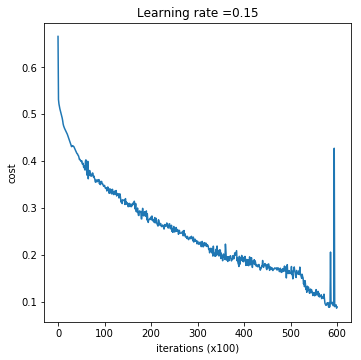

In [50]:
# No regularization, Lambda = 0
model_str="NN-NoReg"
Lambda=0
learn_rate=0.15
hidden_layers = [40,9]   # 40,9
# Run the NN model
# Note: this model does not print anything out until the last 80% of iterations is reached...
parameters = ng_utils.model(X_train.T, y_train.reshape(1,-1), hidden2size=hidden_layers,
                            Lambda=Lambda, num_iterations=60000, learning_rate=learn_rate)

In [51]:
p01s, y_score_train = ng_utils.predict(X_train.T, y_train.reshape(1,-1), parameters)
y_score_train = y_score_train.squeeze()
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 97.6 %


In [52]:
p01s, y_score = ng_utils.predict(X_test.T, y_test.reshape(1,-1), parameters)
y_score = y_score.squeeze()
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 76.06 %


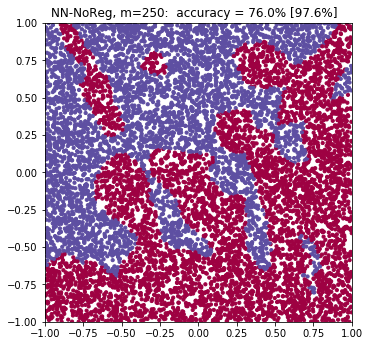

In [53]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [54]:
# --> Now go below to "Show model performance"

#### L2 Regularization

In [55]:
model_str="NN-L2Reg"
Lambda = 5e-4

Cost after iteration 48000: 0.3595208883024445
Cost after iteration 48200: 0.356305109861518
Cost after iteration 48400: 0.3548547505864876
Cost after iteration 48600: 0.3548157951076021
Cost after iteration 48800: 0.3557877339796292
Cost after iteration 49000: 0.3569912527356621
Cost after iteration 49200: 0.3576964714709222
Cost after iteration 49400: 0.355563350768865
Cost after iteration 49600: 0.3575886279714523
Cost after iteration 49800: 0.3520790944761592
Cost after iteration 50000: 0.35644078336815055
Cost after iteration 50200: 0.35570868465275307
Cost after iteration 50400: 0.3534981447899501
Cost after iteration 50600: 0.3548865650521149
Cost after iteration 50800: 0.35534552867262154
Cost after iteration 51000: 0.35171961017599546
Cost after iteration 51200: 0.3531269888620929
Cost after iteration 51400: 0.3542205248461533
Cost after iteration 51600: 0.3532558774658944
Cost after iteration 51800: 0.35405643371778367
Cost after iteration 52000: 0.3556871364619659
Cost after

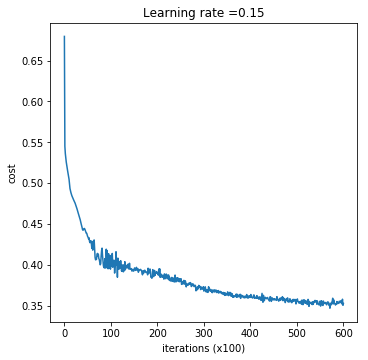

In [56]:
# Run the NN model
# Note: this model does not print anything out until the last 80% of iterations is reached...
parameters = ng_utils.model(X_train.T, y_train.reshape(1,-1), hidden2size=hidden_layers,
                            Lambda=Lambda, num_iterations=60000, learning_rate=learn_rate)

In [57]:
p01s, y_score_train = ng_utils.predict(X_train.T, y_train.reshape(1,-1), parameters)
y_score_train = y_score_train.squeeze()
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 89.2 %


In [58]:
p01s, y_score = ng_utils.predict(X_test.T, y_test.reshape(1,-1), parameters)
y_score = y_score.squeeze()
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 74.83 %


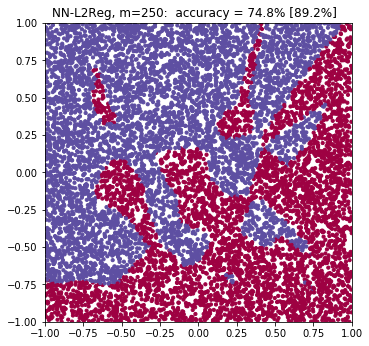

In [59]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [60]:
# --> Now go below to "Show model performance"

- - -
## Show the model performance

### Confusion Matrix, Confusion-Dots Plot, and the ROC

In [61]:
# Look at the distribution of y_score (for fun)
##import seaborn as sns
##sns.distplot(y_score, kde=False, rug=False)


Confusion matrix:

   Predicted   0.0   1.0
Actual                 
0.0          3585  1445
1.0          1071  3899

Results:

 False Pos =  28.727634194831015 %
 False Neg =  21.549295774647888 %
    Recall =  78.45070422535211 %
 Precision =  72.96032934131736 %

    Accuracy =  74.83999999999999 %
 Pos. fract. =  49.7 %


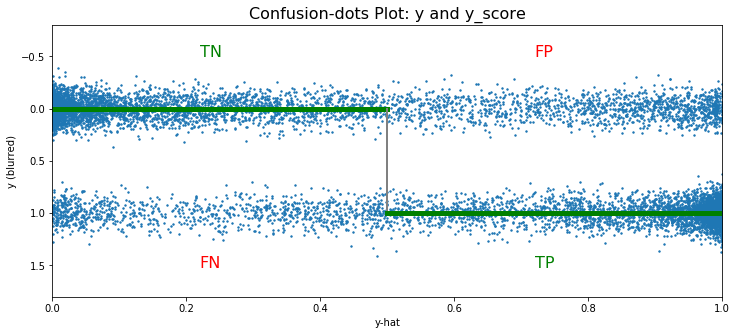

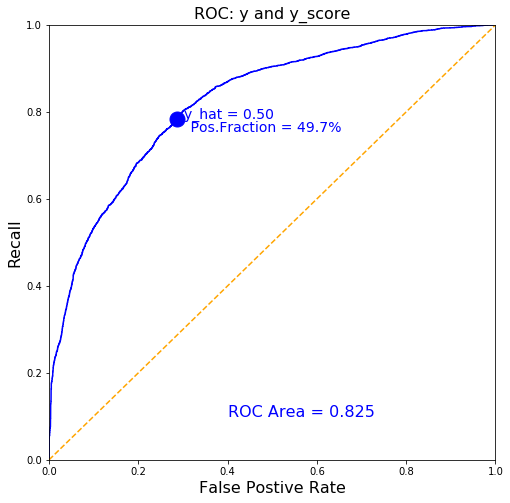

In [62]:
# How does the y_score do?
ysframe = chp.y_yhat_plots(y_test, y_score)

In [63]:
# Can look at the dataframe that is returned
##ysframe.head(5)
##ysframe.tail(5)